In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from nest import detectors
from nest import pls
from nest import overlap 
from nest.overlap import Response
from nest import nell 
from nest import skymap

%config InlineBackend.figure_format = 'retina'

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

c = 299792458 #m/s

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/ic/Desktop/GWBird/nest/skymap.py:212: SyntaxWarning: invalid escape sequence '\G'
  ax[i].set_title("$\Gamma$({0} - {1})".format(which_det1, which_det2))


# Code example for LISA

* Response (Overlap Reduction Function)

In [3]:
f = np.logspace(-5, 0, 1000)

print('Calculating Overlaps...')
print('- tensor modes')
print(' - auto')
R_auto_t = Response.overlap('LISA 1', 'LISA 1', f, 0, 't', None)
print(' - cross')
R_cross_t = overlap.Response.overlap('LISA 1', 'LISA 2', f, 0, 't', None)
print('- vector modes')
print(' - auto')
R_auto_v = overlap.Response.overlap('LISA 1', 'LISA 1', f, 0, 'v', None)
print(' - cross')
R_cross_v = overlap.Response.overlap('LISA 1', 'LISA 2', f, 0, 'v', None)
print('- scalar modes')
print(' - auto')
R_auto_s = overlap.Response.overlap('LISA 1', 'LISA 1', f, 0, 's', None)
print(' - cross')
R_cross_s = overlap.Response.overlap('LISA 1', 'LISA 2', f, 0, 's', None)

Calculating Overlaps...
- tensor modes
 - auto
 - cross


KeyboardInterrupt: 

/opt/anaconda3/envs/dethenv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/dethenv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


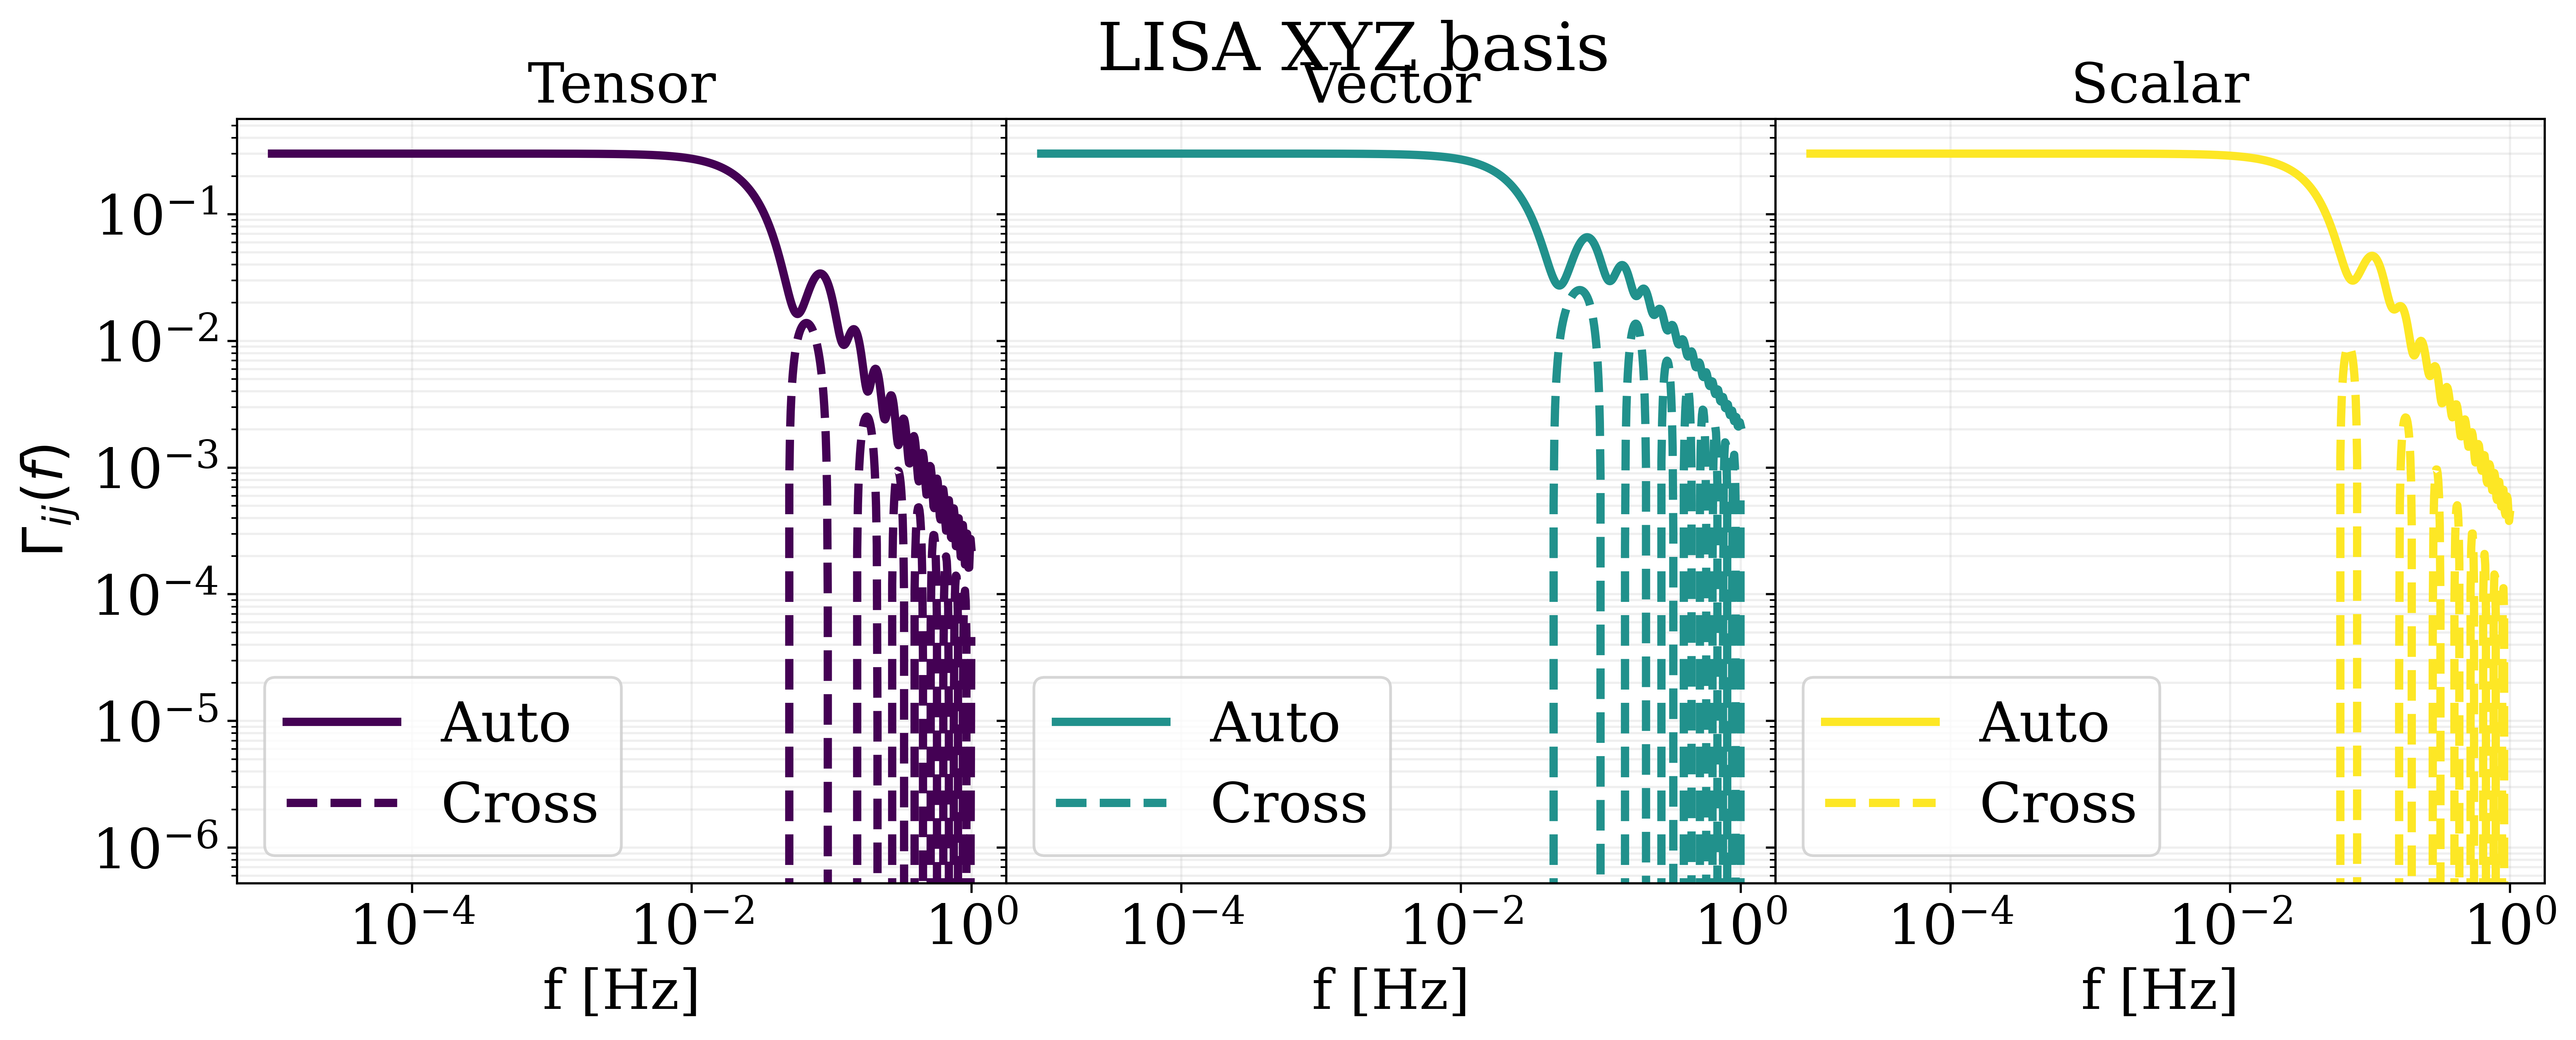

In [5]:
colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

# Plot per il tensor
axs[0].plot(f, R_auto_t, label='Auto', color=colors[0])
axs[0].plot(f, R_cross_t, label='Cross', color=colors[0], linestyle='--')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\Gamma_{ij}(f)$')
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_title('Tensor')

# Plot per il vector
axs[1].plot(f, R_auto_v, label='Auto', color=colors[1])
axs[1].plot(f, R_cross_v, label='Cross', color=colors[1], linestyle='--')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title('Vector')

# Plot per il scalar
axs[2].plot(f, R_auto_s, label='Auto', color=colors[2])
axs[2].plot(f, R_cross_s, label='Cross', color=colors[2], linestyle='--')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('f [Hz]')
axs[2].legend()
axs[2].grid(alpha=0.2, which='both')
axs[2].set_title('Scalar')

# Imposta il titolo principale
fig.suptitle('LISA XYZ basis')

plt.show()

In [4]:
# AET basis

R_AA_t = R_auto_t - R_cross_t
R_TT_t = R_auto_t + 2*R_cross_t

R_AA_v = R_auto_v - R_cross_v
R_TT_v = R_auto_v + 2*R_cross_v

R_AA_s = R_auto_s - R_cross_s
R_TT_s = R_auto_s + 2*R_cross_s


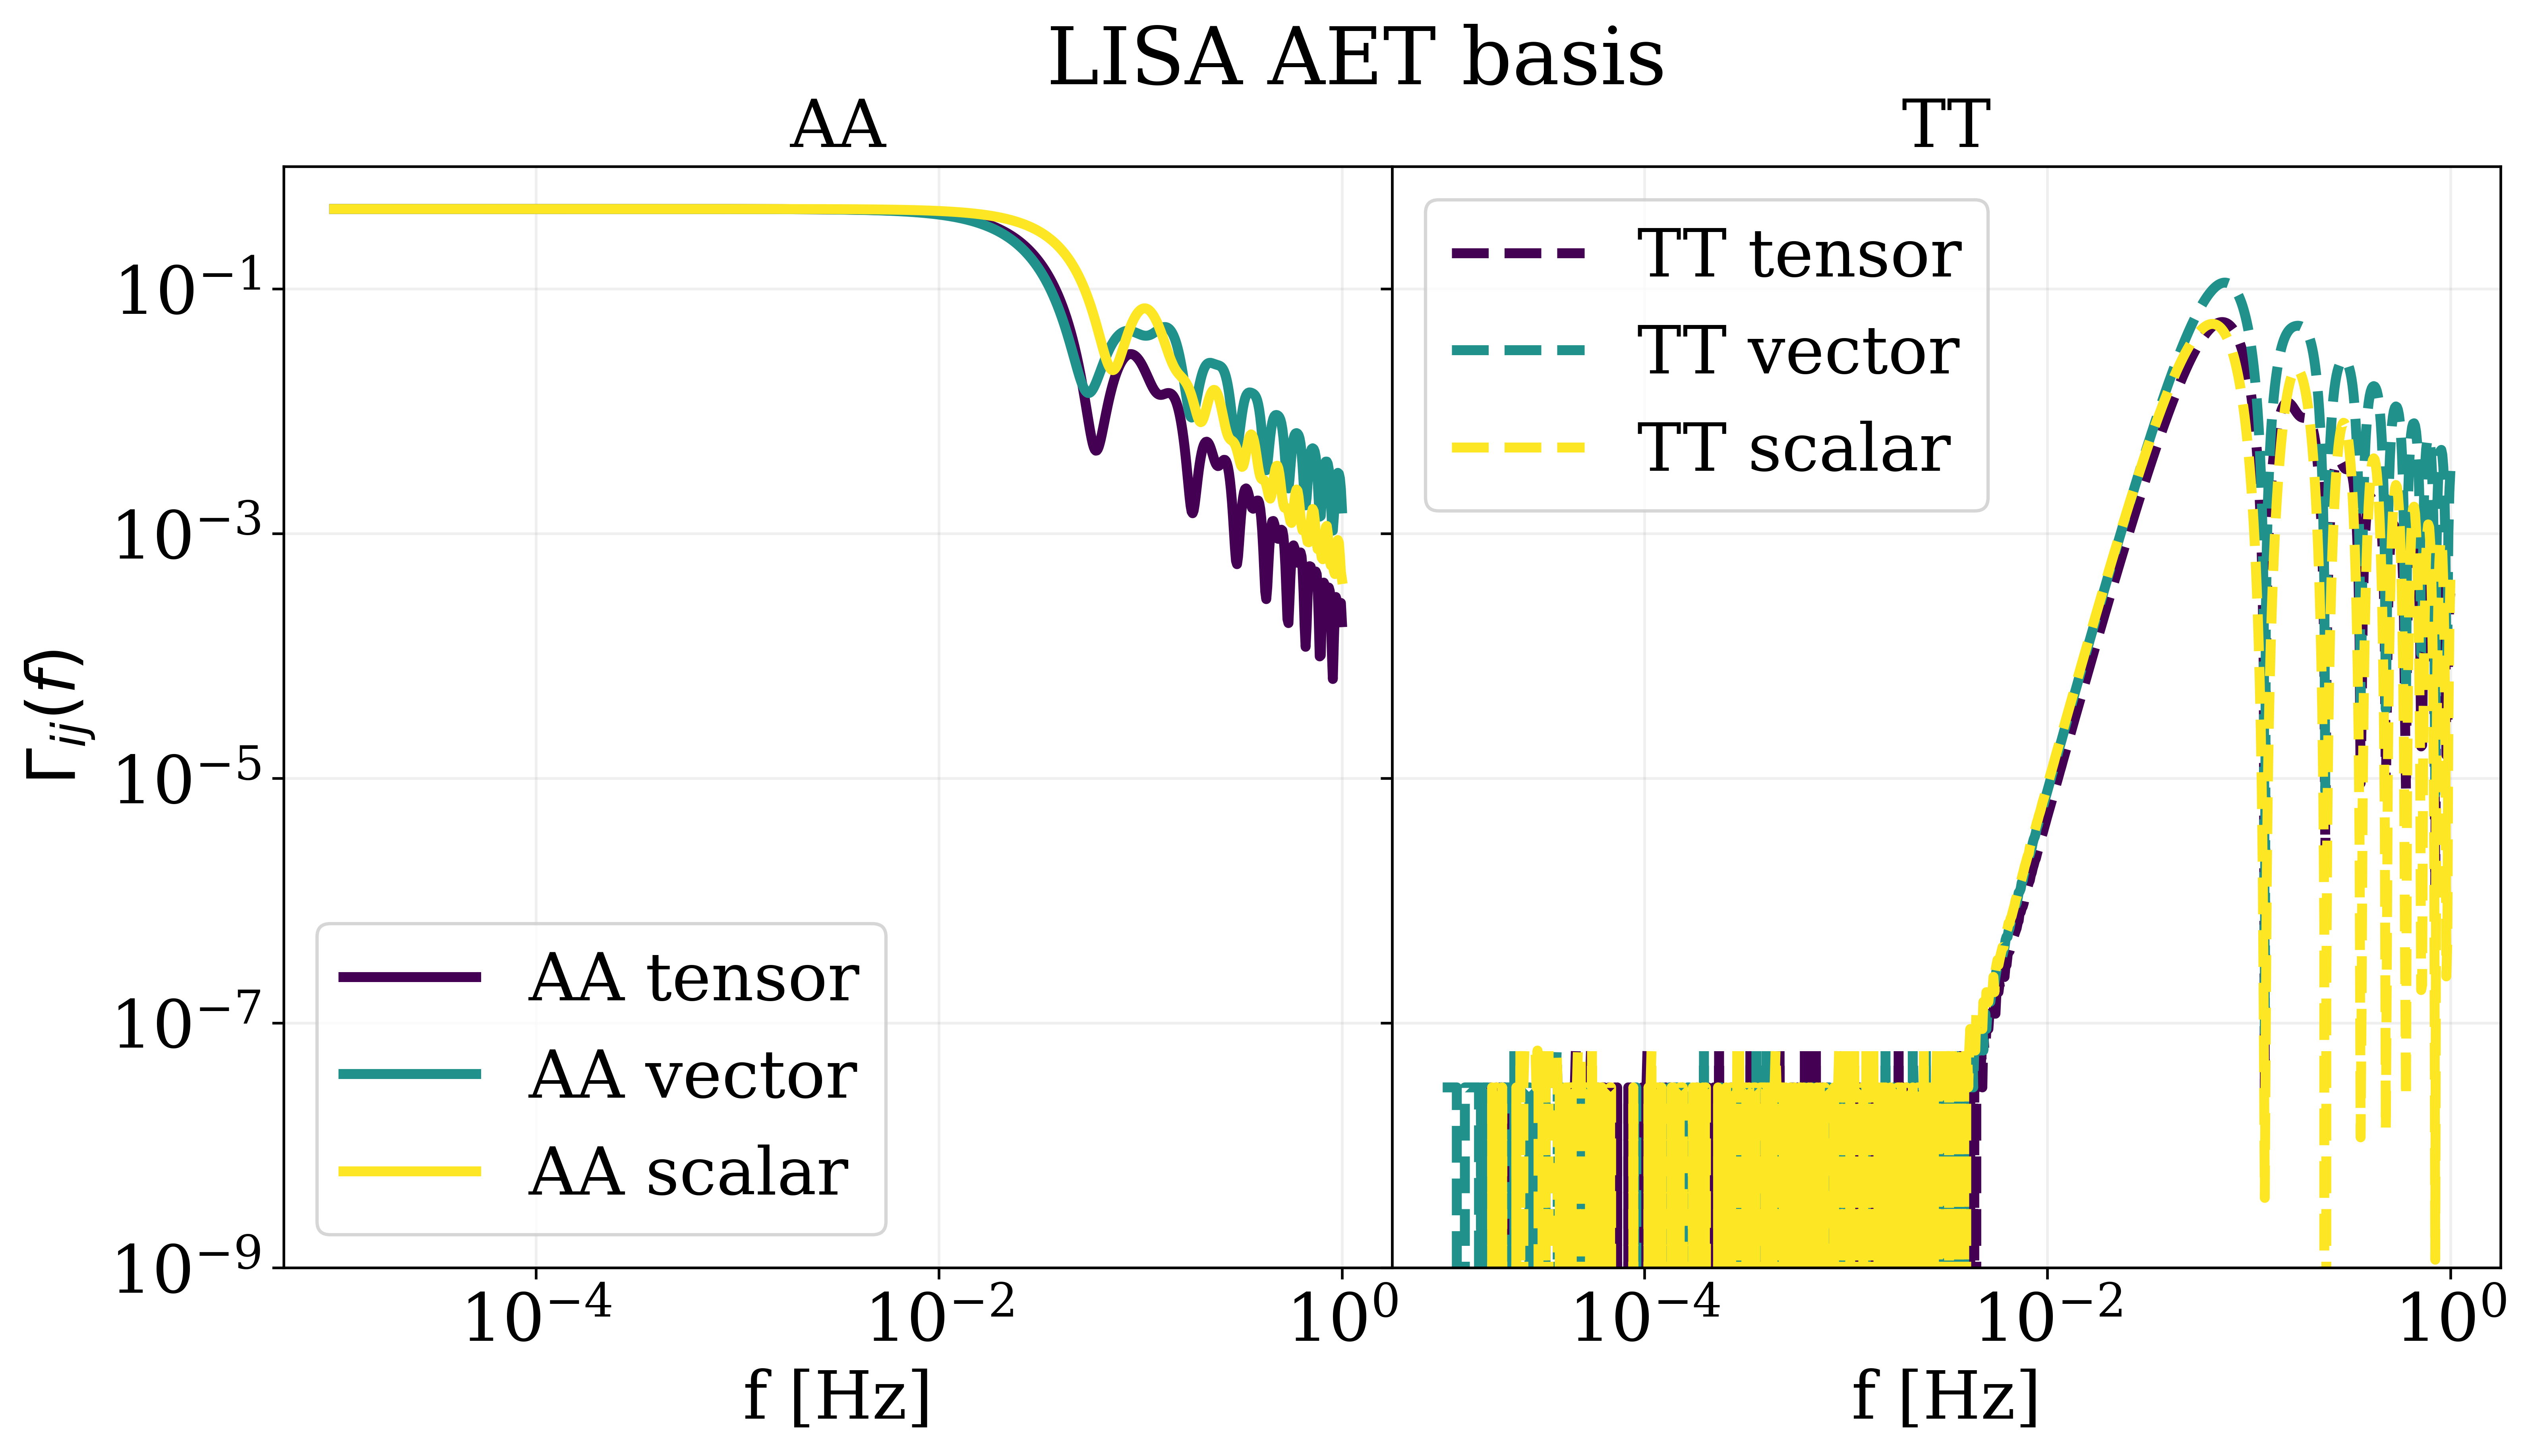

In [6]:
colors = cm.viridis(np.linspace(0, 1, 3))

# Crea la figura e gli assi
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 6), gridspec_kw={'wspace': 0})

# Plot per le serie AA
axs[0].plot(f, R_AA_t, label='AA tensor', color=colors[0])
axs[0].plot(f, R_AA_v, label='AA vector', color=colors[1])
axs[0].plot(f, R_AA_s, label='AA scalar', color=colors[2])
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\Gamma_{ij}(f)$')
axs[0].set_ylim(1e-9, 1)
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_title('AA')

# Plot per le serie TT
axs[1].plot(f, R_TT_t, label='TT tensor', color=colors[0], linestyle='--')
axs[1].plot(f, R_TT_v, label='TT vector', color=colors[1], linestyle='--')
axs[1].plot(f, R_TT_s, label='TT scalar', color=colors[2], linestyle='--')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('f [Hz]')
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title('TT')

# Imposta il titolo principale
fig.suptitle('LISA AET basis')

plt.show()

* Angular Response

In [7]:
print('Calculating l = 0 ...')

print(' * AA')

print('   - tensor')
LISA_R0_AA_t = nell.AngularResponse.R_ell_AET(0, 'AA', 't', f)
print('   - vector')
LISA_R0_AA_v = nell.AngularResponse.R_ell_AET(0, 'AA', 'v', f)
print('   - scalar')
LISA_R0_AA_s = nell.AngularResponse.R_ell_AET(0, 'AA', 's', f)

print(' * TT')
print('   - tensor')
LISA_R0_TT_t = nell.AngularResponse.R_ell_AET(0, 'TT', 't', f)
print('   - vector')
LISA_R0_TT_v = nell.AngularResponse.R_ell_AET(0, 'TT', 'v', f)
print('   - scalar')
LISA_R0_TT_s = nell.AngularResponse.R_ell_AET(0, 'TT', 's', f)

print('Calculating l = 1 ...')

print(' * AE')
print('   - tensor')
LISA_R1_AE_t = nell.AngularResponse.R_ell_AET(1, 'AE', 't', f)
print('   - vector')
LISA_R1_AE_v = nell.AngularResponse.R_ell_AET(1, 'AE', 'v', f)
print('   - scalar')
LISA_R1_AE_s = nell.AngularResponse.R_ell_AET(1, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R1_AT_t = nell.AngularResponse.R_ell_AET(1, 'AT', 't', f)
print('   - vector')
LISA_R1_AT_v = nell.AngularResponse.R_ell_AET(1, 'AT', 'v', f)
print('   - scalar')
LISA_R1_AT_s = nell.AngularResponse.R_ell_AET(1, 'AT', 's', f)

print('Calculating l = 2 ...')  

print(' * AA')
print('   - tensor')
LISA_R2_AA_t = nell.AngularResponse.R_ell_AET(2, 'AA', 't', f)
print('   - vector')
LISA_R2_AA_v = nell.AngularResponse.R_ell_AET(2, 'AA', 'v', f)
print('   - scalar')
LISA_R2_AA_s = nell.AngularResponse.R_ell_AET(2, 'AA', 's', f)

print(' * TT')
print('   - tensor')
LISA_R2_TT_t = nell.AngularResponse.R_ell_AET(2, 'TT', 't', f)
print('   - vector')
LISA_R2_TT_v = nell.AngularResponse.R_ell_AET(2, 'TT', 'v', f)
print('   - scalar')
LISA_R2_TT_s = nell.AngularResponse.R_ell_AET(2, 'TT', 's', f)

print(' * AE')
print('   - tensor')
LISA_R2_AE_t = nell.AngularResponse.R_ell_AET(2, 'AE', 't', f)
print('   - vector')
LISA_R2_AE_v = nell.AngularResponse.R_ell_AET(2, 'AE', 'v', f)
print('   - scalar')
LISA_R2_AE_s = nell.AngularResponse.R_ell_AET(2, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R2_AT_t = nell.AngularResponse.R_ell_AET(2, 'AT', 't', f)
print('   - vector')
LISA_R2_AT_v = nell.AngularResponse.R_ell_AET(2, 'AT', 'v', f)
print('   - scalar')
LISA_R2_AT_s = nell.AngularResponse.R_ell_AET(2, 'AT', 's', f)

print('Calculating l = 3 ...')

print(' * AE')
print('   - tensor')
LISA_R3_AE_t = nell.AngularResponse.R_ell_AET(3, 'AE', 't', f)
print('   - vector')
LISA_R3_AE_v = nell.AngularResponse.R_ell_AET(3, 'AE', 'v', f)
print('   - scalar')
LISA_R3_AE_s = nell.AngularResponse.R_ell_AET(3, 'AE', 's', f)

print(' * AT')
print('   - tensor')
LISA_R3_AT_t = nell.AngularResponse.R_ell_AET(3, 'AT', 't', f)
print('   - vector')
LISA_R3_AT_v = nell.AngularResponse.R_ell_AET(3, 'AT', 'v', f)
print('   - scalar')
LISA_R3_AT_s = nell.AngularResponse.R_ell_AET(3, 'AT', 's', f)


Calculating l = 0 ...
 * AA
   - tensor
   - vector
   - scalar
 * TT
   - tensor
   - vector
   - scalar
Calculating l = 1 ...
 * AE
   - tensor
   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar
Calculating l = 2 ...
 * AA
   - tensor
   - vector
   - scalar
 * TT
   - tensor
   - vector
   - scalar
 * AE
   - tensor
   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar
Calculating l = 3 ...
 * AE
   - tensor


/Users/ic/Desktop/GWBird/nest/nell.py:32: RuntimeWarning: floating point number truncated to an integer
  sph_harm_val = sph_harm(m, l, y, x)


   - vector
   - scalar
 * AT
   - tensor
   - vector
   - scalar


In [8]:
colors = cm.viridis(np.linspace(0, 1, 3))

fig, axs = plt.subplots(2, 2, figsize=(16, 14), gridspec_kw={'wspace': 0.2, 'hspace': 0.3})

axs[0,0].loglog(f, LISA_R0_AA_t, label=r'$\ell=0$ tensor', color=colors[0])
axs[0,0].loglog(f, LISA_R0_AA_v, label=r'$\ell=0$ vector', color=colors[1])
axs[0,0].loglog(f, LISA_R0_AA_s, label=r'$\ell=0$ scalar', color=colors[2])
axs[0,0].loglog(f, LISA_R2_AA_t, label=r'$\ell=2$ tensor', color=colors[0], linestyle = '--')
axs[0,0].loglog(f, LISA_R2_AA_v, label=r'$\ell=2$ vector', color=colors[1], linestyle = '--')
axs[0,0].loglog(f, LISA_R2_AA_s, label=r'$\ell=2$ scalar', color=colors[2], linestyle = '--')
axs[0,0].set_xlabel('f [Hz]')
axs[0,0].set_ylabel(r'$R_{\ell}$')
axs[0,0].set_ylim(1e-7, 1)
axs[0,0].set_xlim(1e-5, 1)
axs[0,0].legend()
axs[0,0].grid(alpha=0.2, which='both')
axs[0,0].set_title(r'$AA$')

axs[0,1].loglog(f, LISA_R0_TT_t, label='tensor', color=colors[0])
axs[0,1].loglog(f, LISA_R0_TT_v, label='vector', color=colors[1])
axs[0,1].loglog(f, LISA_R0_TT_s, label='scalar', color=colors[2])
axs[0,1].loglog(f, LISA_R2_TT_t, label='tensor', color=colors[0], linestyle = '--')
axs[0,1].loglog(f, LISA_R2_TT_v, label='vector', color=colors[1], linestyle = '--')
axs[0,1].loglog(f, LISA_R2_TT_s, label='scalar', color=colors[2], linestyle = '--')
axs[0,1].set_xlabel('f [Hz]')
axs[0,1].set_ylim(1e-7, 1)
axs[0,1].set_xlim(1e-2, 1)
axs[0,1].grid(alpha=0.2, which='both')
axs[0,1].set_title(r'$TT$')

axs[1,0].loglog(f, LISA_R2_AE_t, label='tensor', color=colors[0], linestyle = '--')
axs[1,0].loglog(f, LISA_R2_AE_v, label='vector', color=colors[1], linestyle = '--')
axs[1,0].loglog(f, LISA_R2_AE_s, label='scalar', color=colors[2], linestyle = '--')
axs[1,0].set_xlabel('f [Hz]')
axs[1,0].set_ylabel(r'$R_{\ell}$')
axs[1,0].set_xlim(1e-5, 1)
axs[1,0].grid(alpha=0.2, which='both')
axs[1,0].set_title(r'$AE$')

axs[1,1].loglog(f, LISA_R2_AT_t, label='tensor', color=colors[0], linestyle = '--')
axs[1,1].loglog(f, LISA_R2_AT_v, label='vector', color=colors[1], linestyle = '--')
axs[1,1].loglog(f, LISA_R2_AT_s, label='scalar', color=colors[2], linestyle = '--')
axs[1,1].set_xlabel('f [Hz]')
axs[1,1].set_ylim(1e-7, 1)
axs[1,1].set_xlim(1e-3, 1)
axs[1,1].grid(alpha=0.2, which='both')
axs[1,1].set_title(r'$AT$')

fig.suptitle(r'LISA (even multipoles)')


Text(0.5, 0.98, 'LISA (even multipoles)')

Text(0.5, 0.98, 'LISA (odd multipoles)')

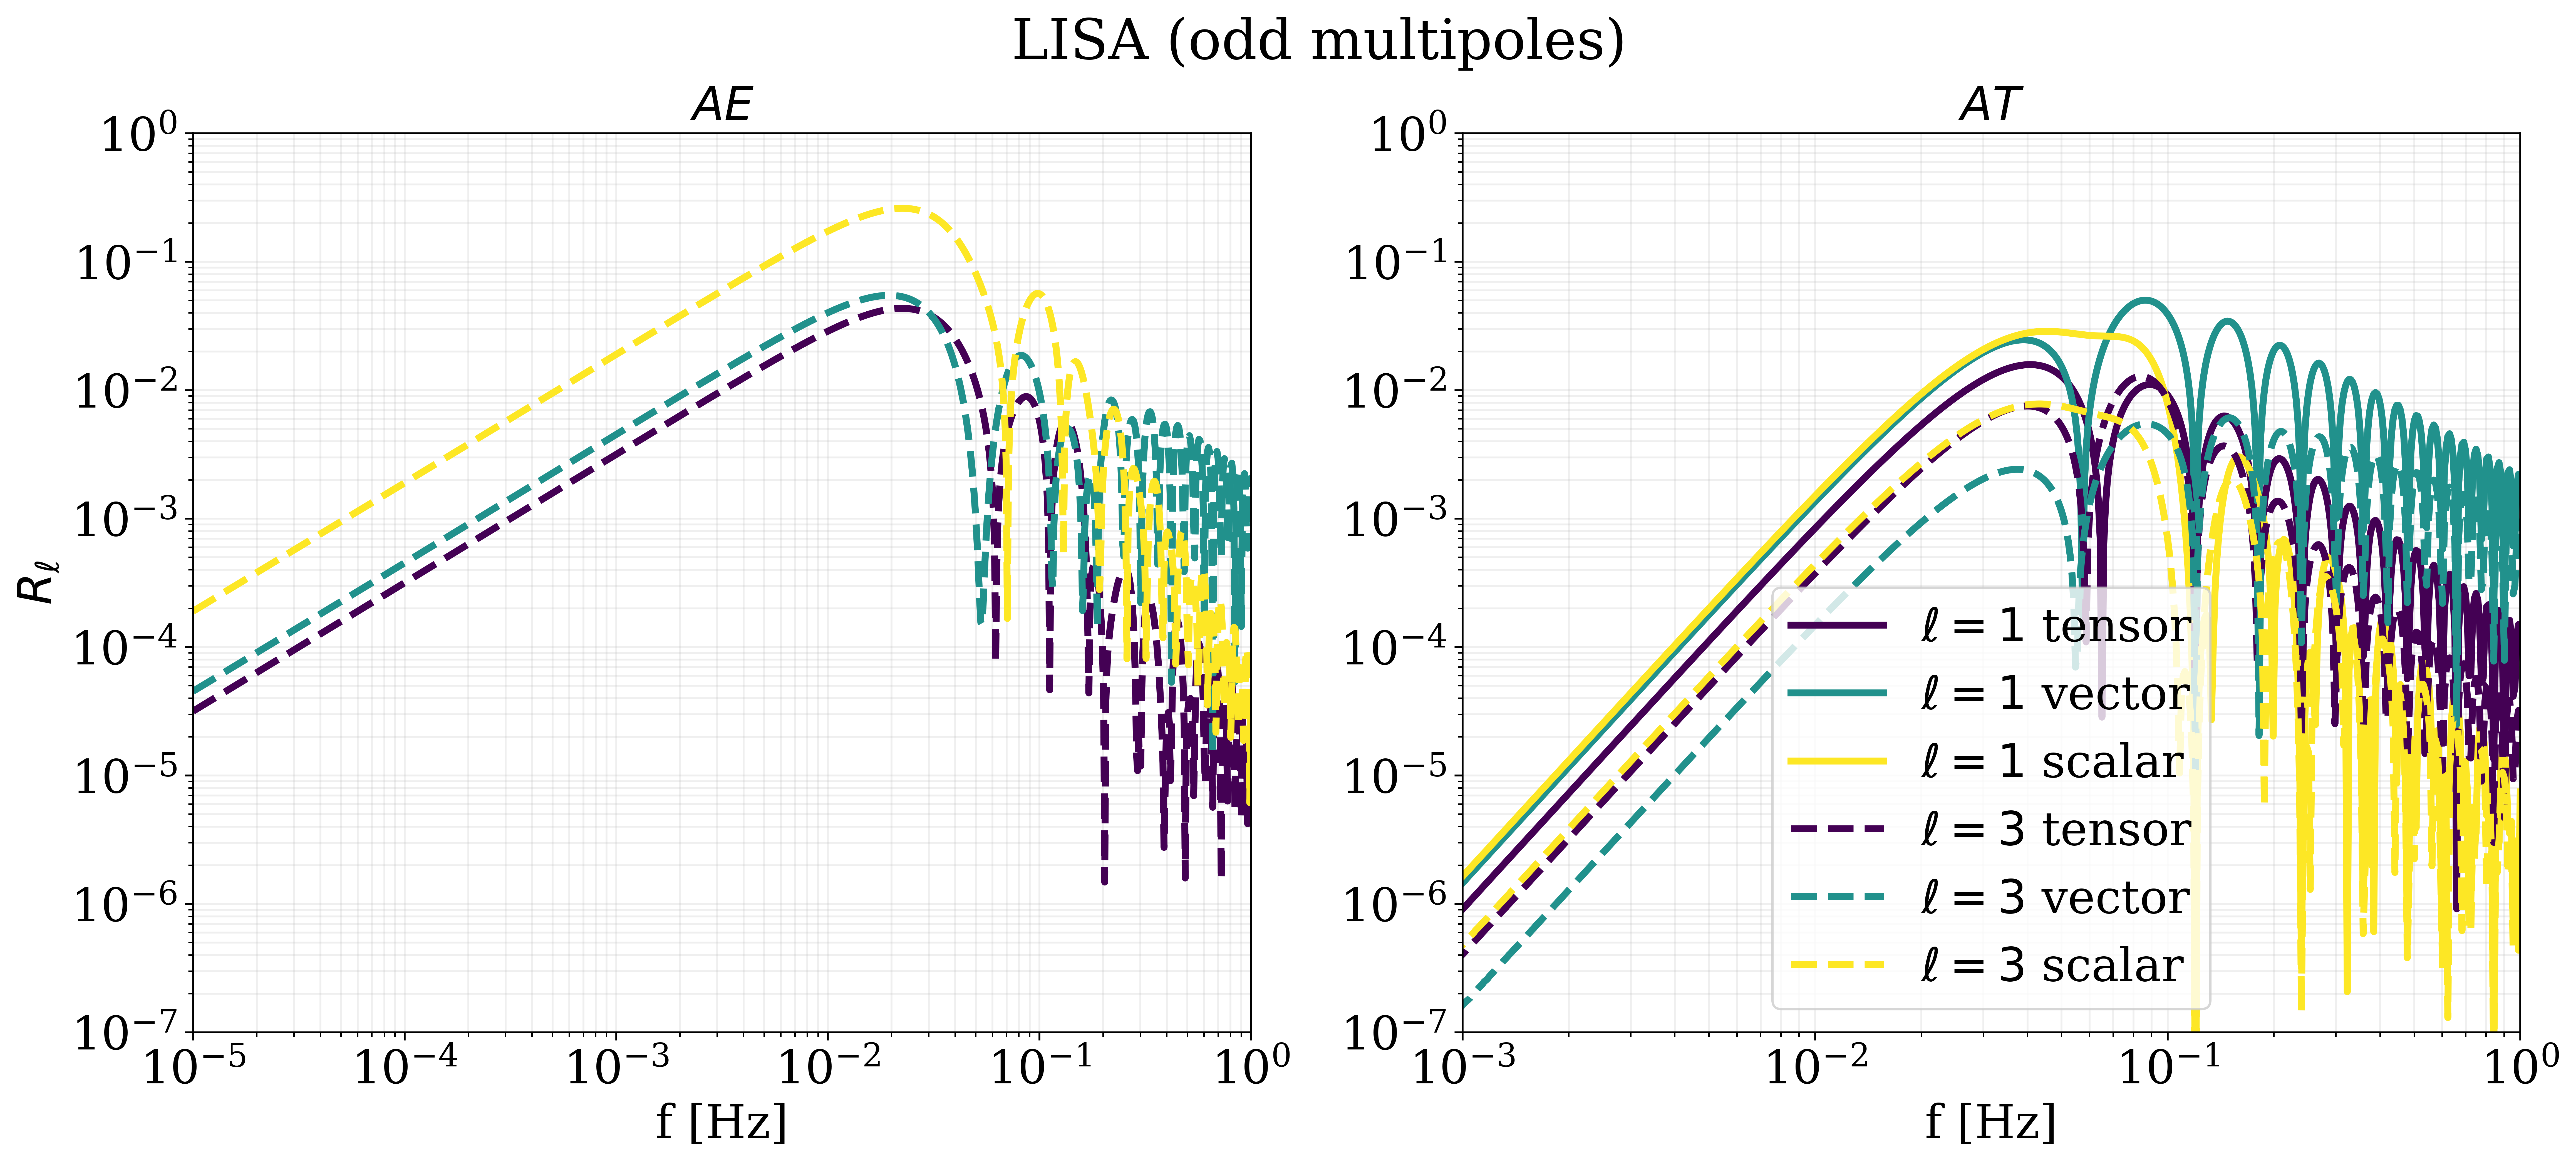

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7),  gridspec_kw={'wspace': 0.2, 'hspace': 0.1})


axs[0].loglog(f, LISA_R3_AE_t, label=r'$\ell=1$ tensor', color=colors[0], linestyle = '--')
axs[0].loglog(f, LISA_R3_AE_v, label=r'$\ell=1$ vector', color=colors[1], linestyle = '--')
axs[0].loglog(f, LISA_R3_AE_s, label=r'$\ell=1$ scalar', color=colors[2], linestyle = '--')
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$R_{\ell}$')
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(1e-5, 1)
axs[0].set_ylim(1e-7, 1)
axs[0].set_title(r'$AE$')

axs[1].loglog(f, LISA_R1_AT_t, label=r'$\ell=1$ tensor', color=colors[0])
axs[1].loglog(f, LISA_R1_AT_v, label=r'$\ell=1$ vector', color=colors[1])
axs[1].loglog(f, LISA_R1_AT_s, label=r'$\ell=1$ scalar', color=colors[2])
axs[1].loglog(f, LISA_R3_AT_t, label=r'$\ell=3$ tensor', color=colors[0], linestyle = '--')
axs[1].loglog(f, LISA_R3_AT_v, label=r'$\ell=3$ vector', color=colors[1], linestyle = '--')
axs[1].loglog(f, LISA_R3_AT_s, label=r'$\ell=3$ scalar', color=colors[2], linestyle = '--')
axs[1].set_xlabel('f [Hz]')
axs[1].set_xlim(1e-3, 1)
axs[1].set_ylim(1e-7, 1)
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')
axs[1].set_title(r'$AT$')

fig.suptitle(r'LISA (odd multipoles)')

* Power Law Integrated Sensitivity Curve

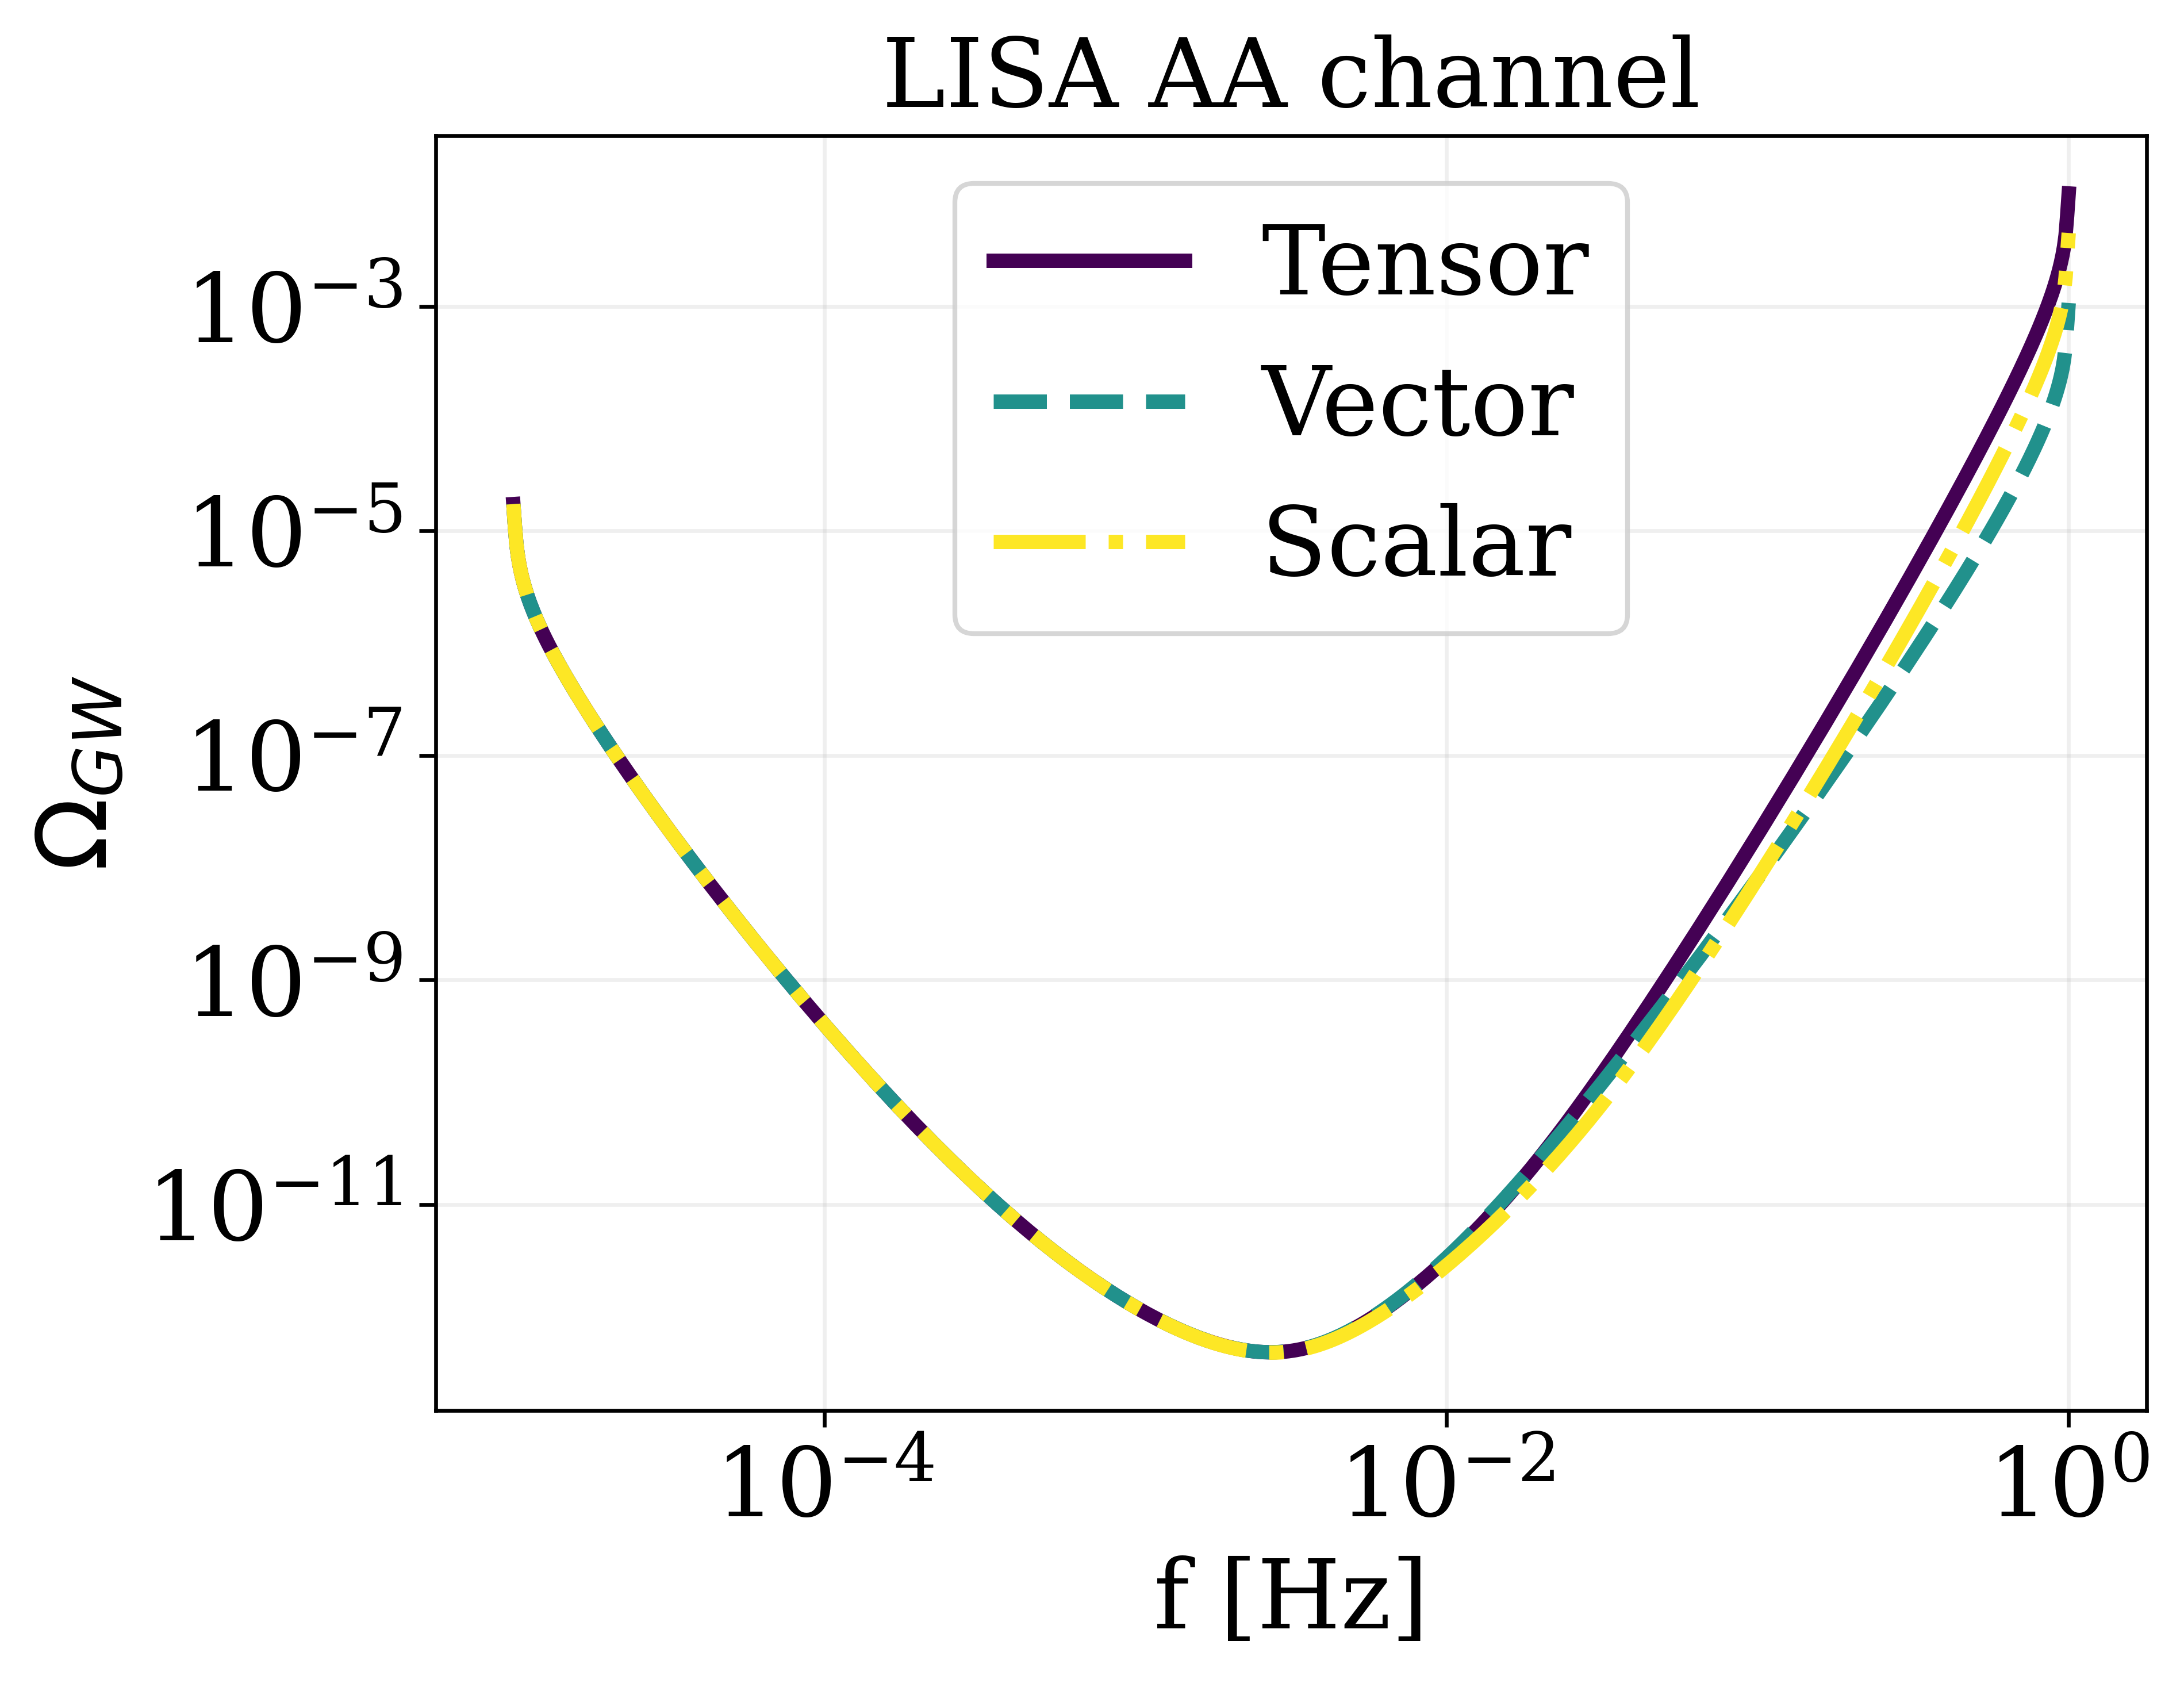

In [11]:
fref = 1e-2
snr = 10
Tobs = 3
beta_min = -40
beta_max = 40

pls_LISA_t = pls.PLS('LISA 1', 'LISA 1', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_LISA_v = pls.PLS('LISA 1', 'LISA 1', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_LISA_s = pls.PLS('LISA 1', 'LISA 1', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_LISA_t, label='Tensor', color=colors[0])
plt.plot(f, pls_LISA_v, label='Vector', color=colors[1], linestyle='--')
plt.plot(f, pls_LISA_s, label='Scalar', color=colors[2], linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.title(r'LISA AA channel')
plt.legend()

* Angular Sensitivity

In [12]:

Omega_0_t_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 0, 't')
Omega_0_v_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 0, 'v')
Omega_0_s_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 0, 's')

Omega_1_t_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 1, 't')
Omega_1_v_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 1, 'v')
Omega_1_s_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 1, 's')

Omega_2_t_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 2, 't')
Omega_2_v_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 2, 'v')
Omega_2_s_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 2, 's')

Omega_3_t_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 3, 't')
Omega_3_v_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 3, 'v')
Omega_3_s_LISA = nell.Sensitivity_ell.Omega_ell_LISA(f, 3, 's')

/Users/ic/Desktop/GWBird/nest/nell.py:32: RuntimeWarning: floating point number truncated to an integer
  sph_harm_val = sph_harm(m, l, y, x)


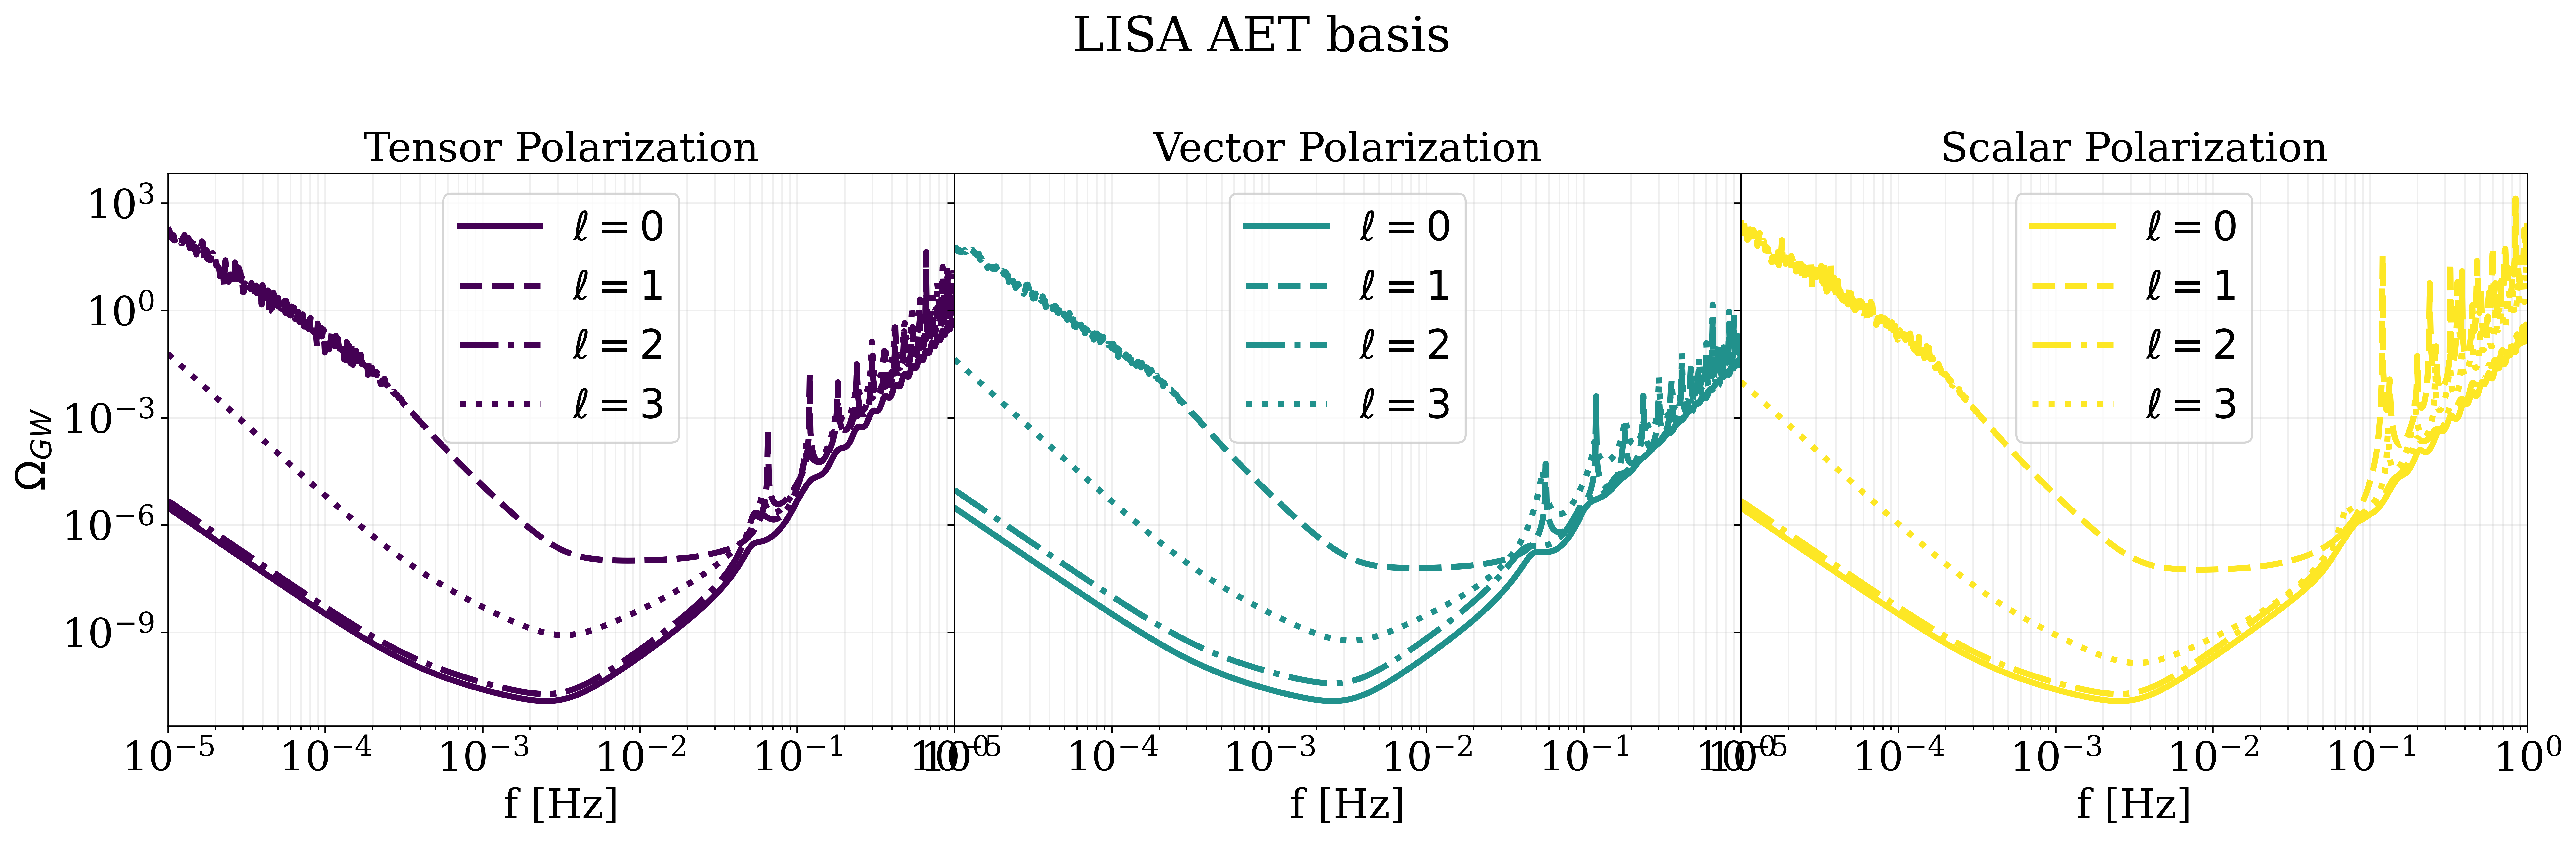

In [13]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))

# Stili di linea
linestyles = ['-', '--', '-.', ':']

# Crea una figura con tre subplot sulla stessa riga
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True, gridspec_kw={'wspace': 0}) 

# Plot per la polarizzazione tensoriale
axs[0].loglog(f, Omega_0_t_LISA, label=r'$\ell=0$', color=colors[0], linestyle=linestyles[0])
axs[0].loglog(f, Omega_1_t_LISA, label=r'$\ell=1$', color=colors[0], linestyle=linestyles[1])
axs[0].loglog(f, Omega_2_t_LISA, label=r'$\ell=2$', color=colors[0], linestyle=linestyles[2])
axs[0].loglog(f, Omega_3_t_LISA, label=r'$\ell=3$', color=colors[0], linestyle=linestyles[3])
axs[0].set_xlabel('f [Hz]')
axs[0].set_ylabel(r'$\Omega_{GW}$')
axs[0].legend()
axs[0].grid(alpha=0.2, which='both')
axs[0].set_xlim(1e-5, 1)
axs[0].set_title('Tensor Polarization')

# Plot per la polarizzazione vettoriale
axs[1].loglog(f, Omega_0_v_LISA, label=r'$\ell=0$', color=colors[1], linestyle=linestyles[0])
axs[1].loglog(f, Omega_1_v_LISA, label=r'$\ell=1$', color=colors[1], linestyle=linestyles[1])
axs[1].loglog(f, Omega_2_v_LISA, label=r'$\ell=2$', color=colors[1], linestyle=linestyles[2])
axs[1].loglog(f, Omega_3_v_LISA, label=r'$\ell=3$', color=colors[1], linestyle=linestyles[3])
axs[1].set_xlabel('f [Hz]')
axs[1].set_xlim(1e-5, 1)
axs[1].legend()
axs[1].grid(alpha=0.2, which='both')

axs[1].set_title('Vector Polarization')

# Plot per la polarizzazione scalare
axs[2].loglog(f, Omega_0_s_LISA, label=r'$\ell=0$', color=colors[2], linestyle=linestyles[0])
axs[2].loglog(f, Omega_1_s_LISA, label=r'$\ell=1$', color=colors[2], linestyle=linestyles[1])
axs[2].loglog(f, Omega_2_s_LISA, label=r'$\ell=2$', color=colors[2], linestyle=linestyles[2])
axs[2].loglog(f, Omega_3_s_LISA, label=r'$\ell=3$', color=colors[2], linestyle=linestyles[3])
axs[2].set_xlabel('f [Hz]')
axs[2].set_xlim(1e-5, 1)
axs[2].legend()
axs[2].grid(alpha=0.2, which='both')


axs[2].set_title('Scalar Polarization')

fig.suptitle(r'LISA AET basis')

# Mostra il grafico
plt.tight_layout()
plt.show()